In [2]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read CSV files into pandas DataFrames
df1 = pd.read_csv('Datasets/Mandalay_data.csv')
df2 = pd.read_csv('Datasets/Naypyitaw_data.csv')
df3 = pd.read_csv('Datasets/Yangon_data.csv')

# Merge DataFrames
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Write the merged DataFrame to a new CSV file
merged_df.to_csv('Merged_Dataset.csv', index=False)

In [4]:
#importing data set
sales = pd.read_csv("Merged_Dataset.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4


In [5]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [8]:
sales['Date']

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
995   2019-03-22
996   2019-03-10
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [9]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [10]:
sales.set_index('Date',inplace =True)
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-20,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,13:27,Credit card,164.52,4.761905,8.226,5.9
2019-02-06,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,18:07,Ewallet,57.92,4.761905,2.896,4.5
2019-03-09,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,17:03,Cash,102.04,4.761905,5.102,6.8
2019-01-15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,16:19,Cash,562.32,4.761905,28.116,4.5
2019-03-11,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,15:30,Ewallet,80.60,4.761905,4.030,4.4


In [11]:
sales.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [12]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
sales.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [14]:
np.round(sales.corr(numeric_only=True), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


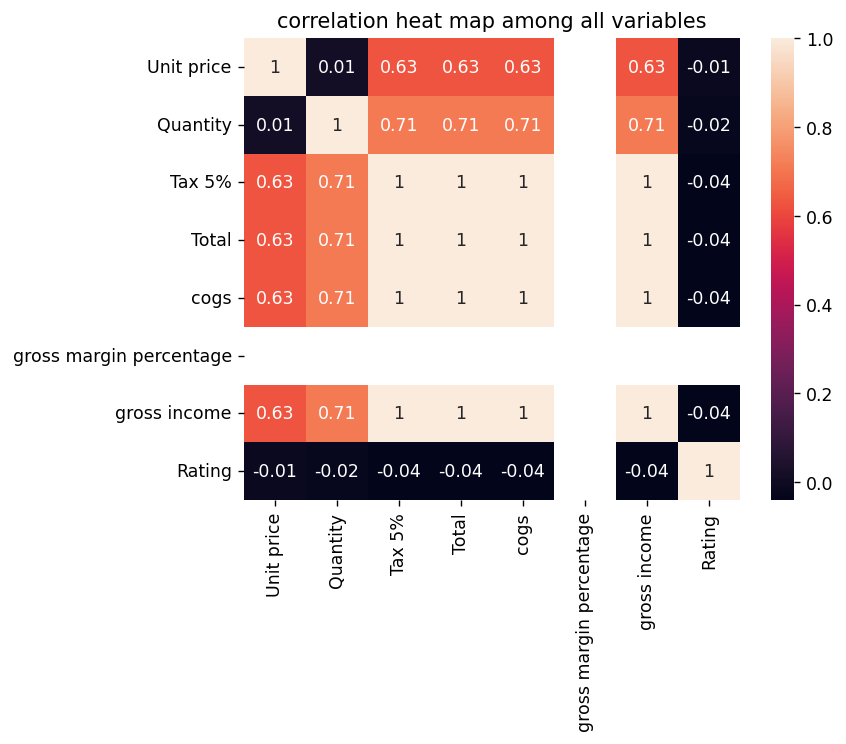

In [15]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.corr(numeric_only=True),2),annot=True)
plt.title("correlation heat map among all variables")
plt.show()

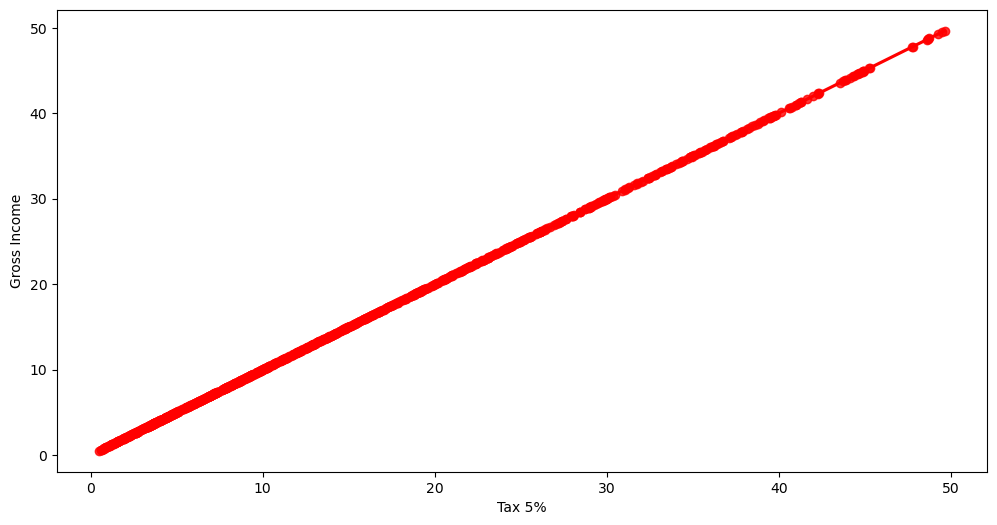

In [16]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

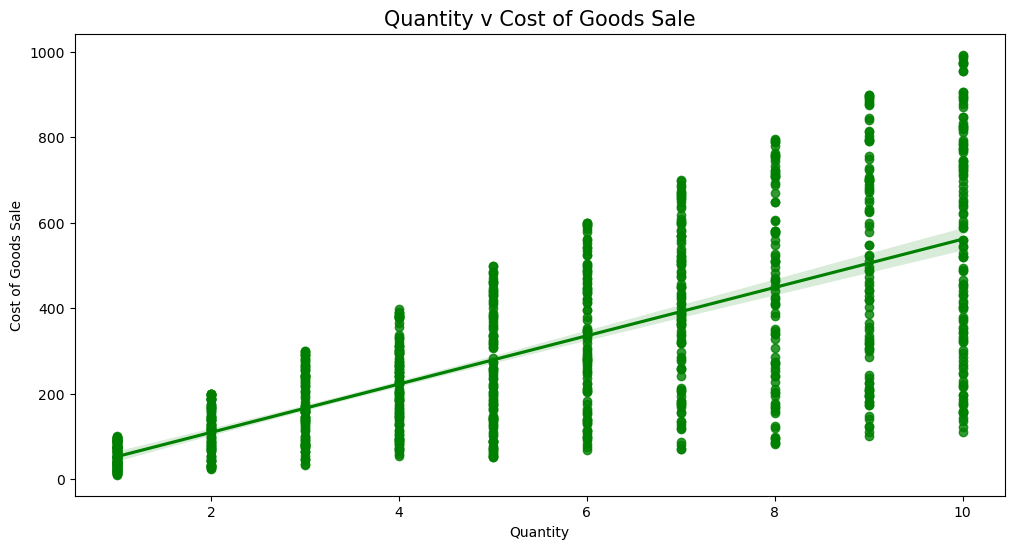

In [17]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=sales,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

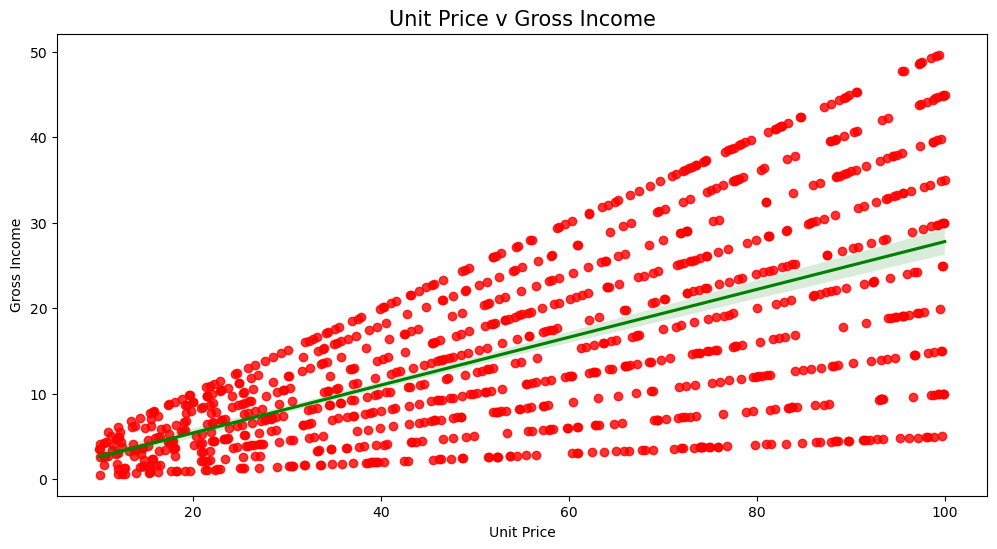

In [18]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=sales,scatter_kws={"color": "red"}, line_kws={"color": "green"})
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

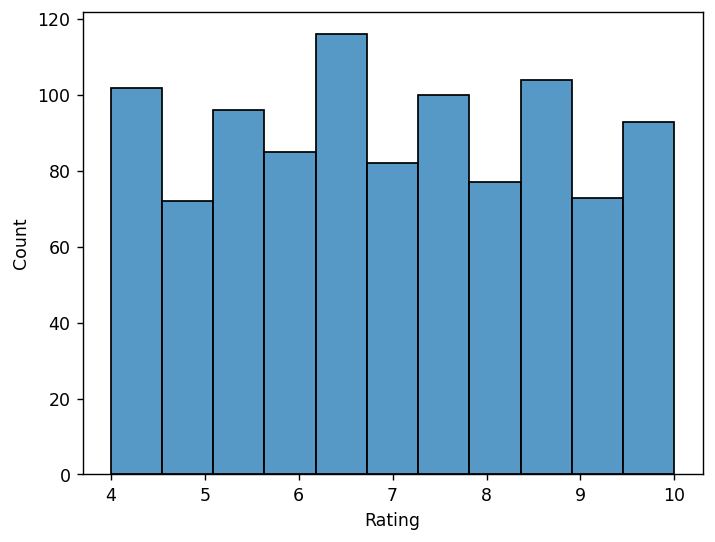

In [19]:
plt.figure(dpi=125) 
sns.histplot(sales['Rating'],kde=False)
plt.show()

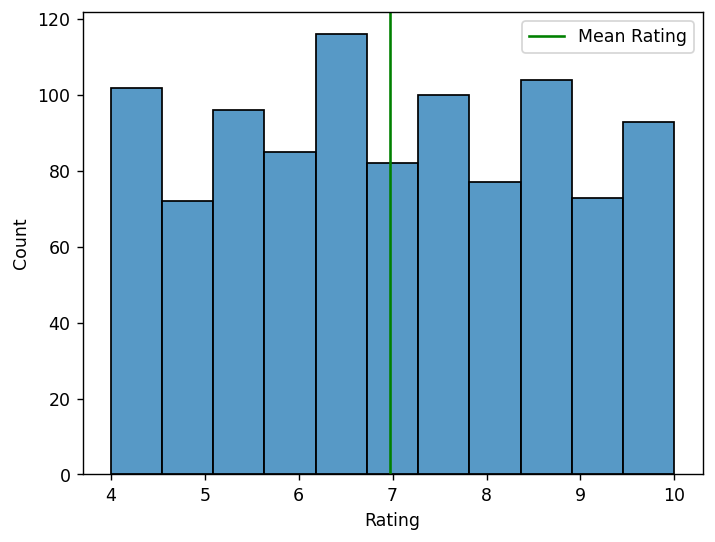

In [20]:
plt.figure(dpi=125)
sns.histplot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

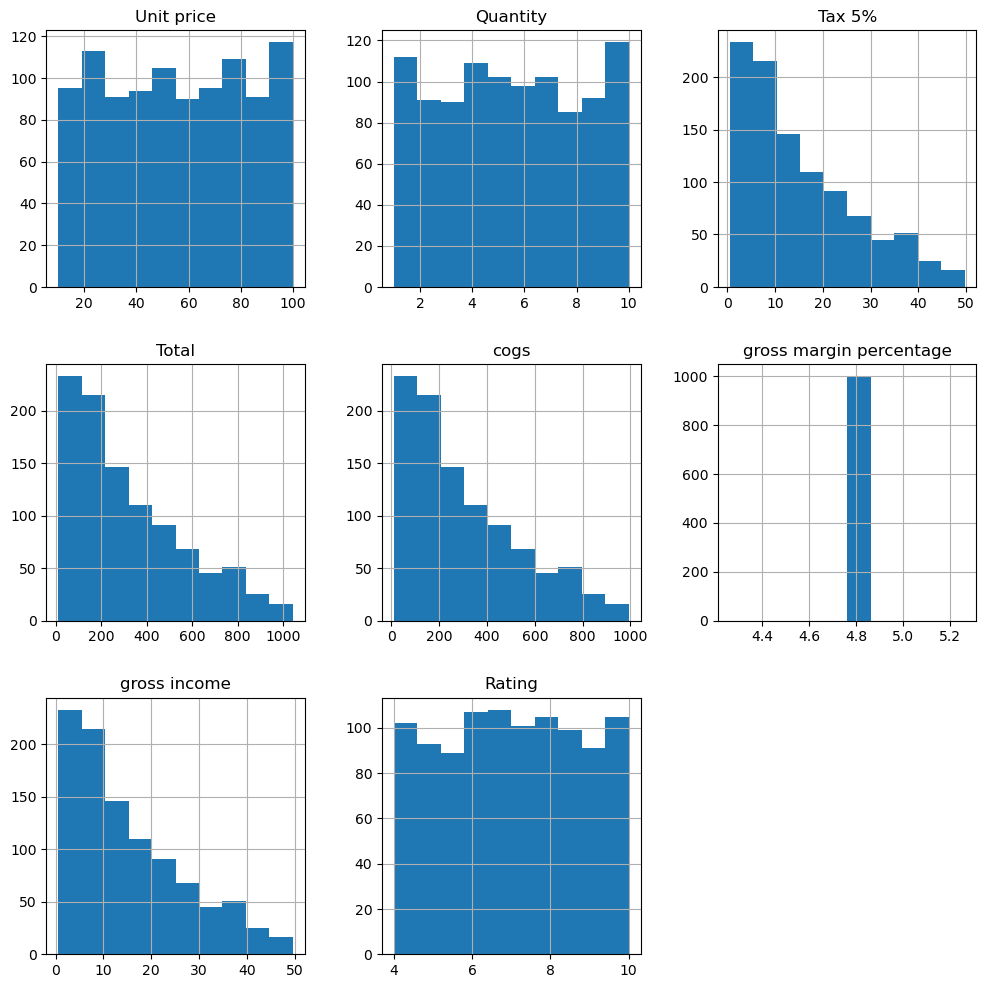

In [21]:
sales.hist(figsize=(12,12))
plt.show()

Text(0.5, 1.0, ' density plot')

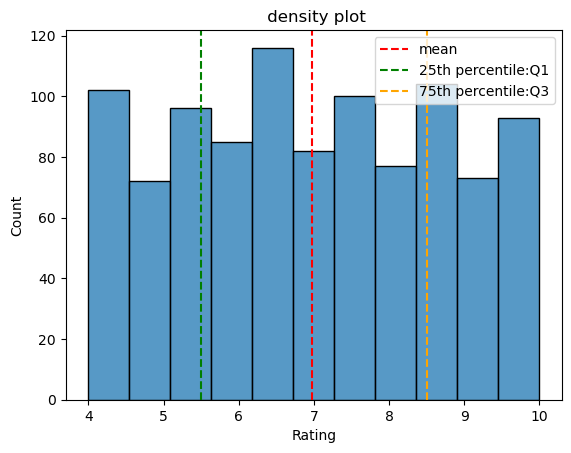

In [22]:
sns.histplot(sales['Rating'])
plt.axvline(x=np.mean(sales['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(sales['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(sales['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()
plt.title(" density plot")

A    340
B    332
C    328
Name: Branch, dtype: int64


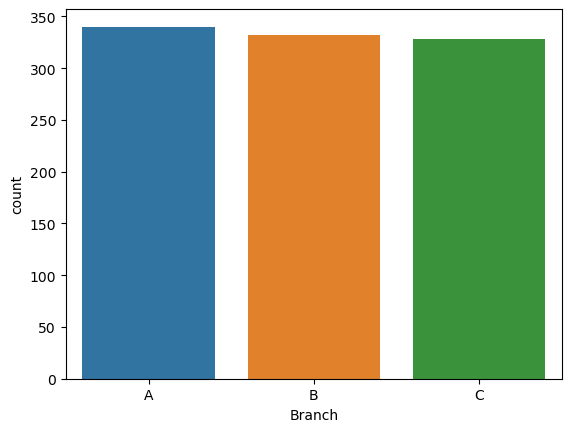

In [23]:
# Convert 'Branch' column to categorical data
sales['Branch'] = sales['Branch'].astype('category')

# Create a count plot for the 'Branch' column
sns.countplot(x='Branch', data=sales)

# Display the counts of each category in the 'Branch' column
print(sales['Branch'].value_counts())


Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


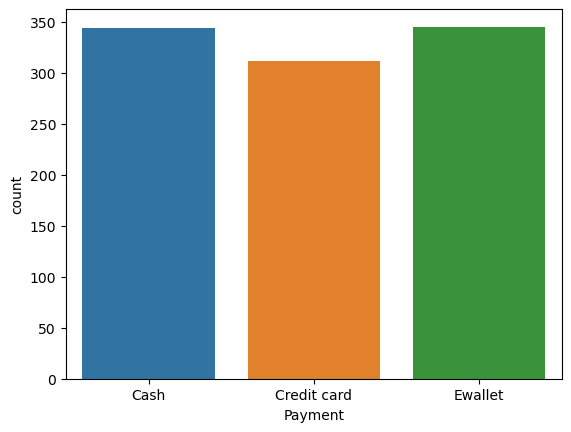

In [24]:
# Convert 'Payment' column to categorical data
sales['Payment'] = sales['Payment'].astype('category')

# Create a count plot for the 'Payment' column
sns.countplot(x='Payment', data=sales)

# Display the counts of each category in the 'Payment' column
print(sales['Payment'].value_counts())

<Axes: xlabel='Rating', ylabel='gross income'>

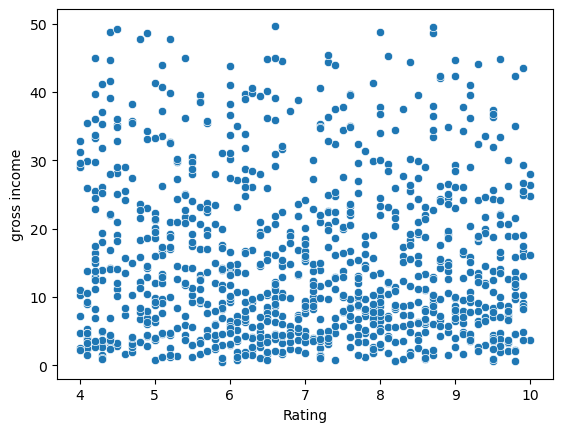

In [25]:
# Create a scatter plot for 'Rating' against 'gross income'
sns.scatterplot(x='Rating', y='gross income', data=sales)

<Axes: xlabel='Rating', ylabel='gross income'>

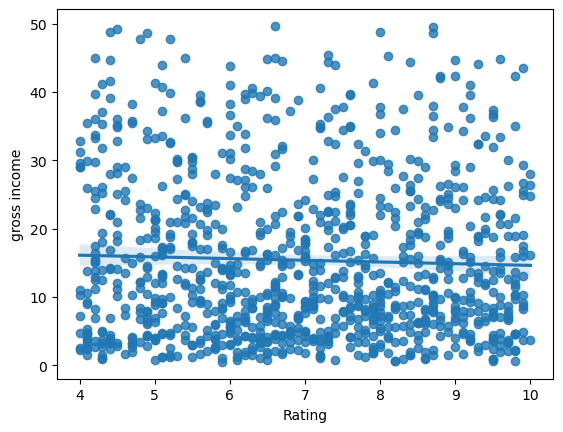

In [26]:
# Convert 'gross income' column to numeric
sales['gross income'] = pd.to_numeric(sales['gross income'], errors='coerce')

# Create a regression plot for 'Rating' against 'gross income'
sns.regplot(x='Rating', y='gross income', data=sales)

<Axes: xlabel='Branch', ylabel='gross income'>

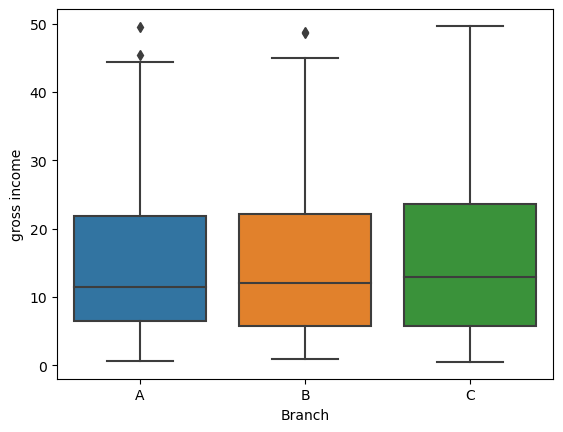

In [27]:
sns.boxplot(x=sales['Branch'], y=sales['gross income'])

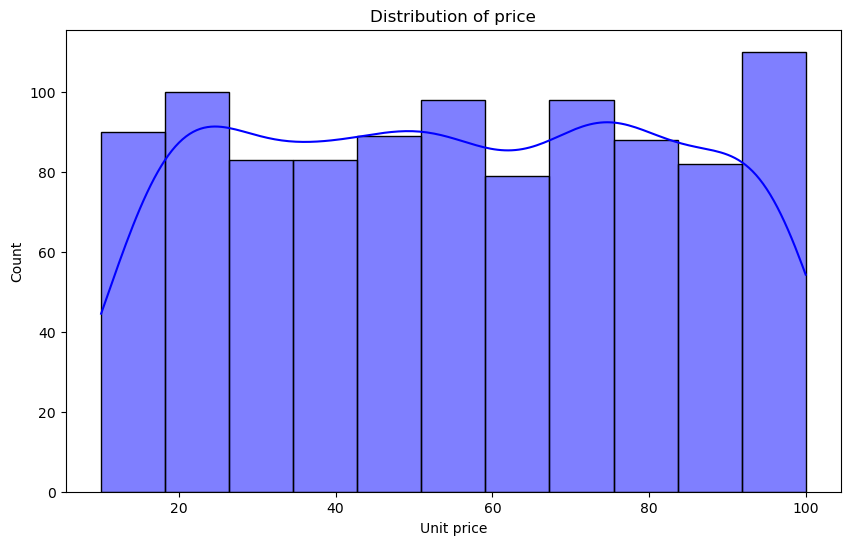

In [28]:
plt.figure(figsize=(10,6))
plt.title('Distribution of price')
sns.histplot(sales['Unit price'],color='Blue',kde=True)
plt.show()

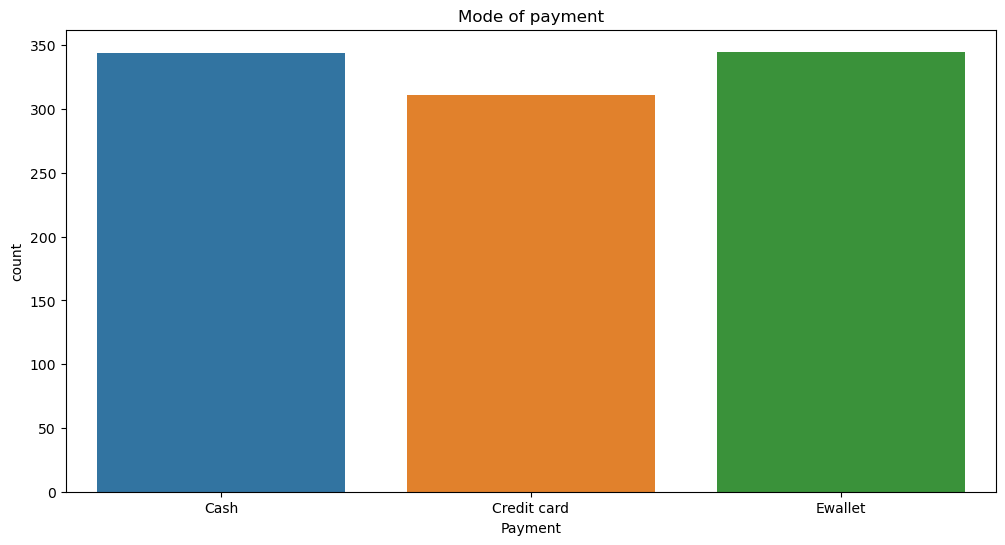

In [29]:
plt.figure(figsize=(12,6))
plt.title("Mode of payment")
sns.countplot(data=sales, x='Payment');

In [30]:
Quantity_bought = sales.groupby("Product line")[["Unit price", 'Quantity']].sum()
Quantity_bought

,Unit price,Quantity
Product line,,
Electronic accessories,9103.77,971
Fashion accessories,10173.35,902
Food and beverages,9745.54,952
Health and beauty,8337.88,854
Home and lifestyle,8850.71,911
Sports and travel,9460.88,920


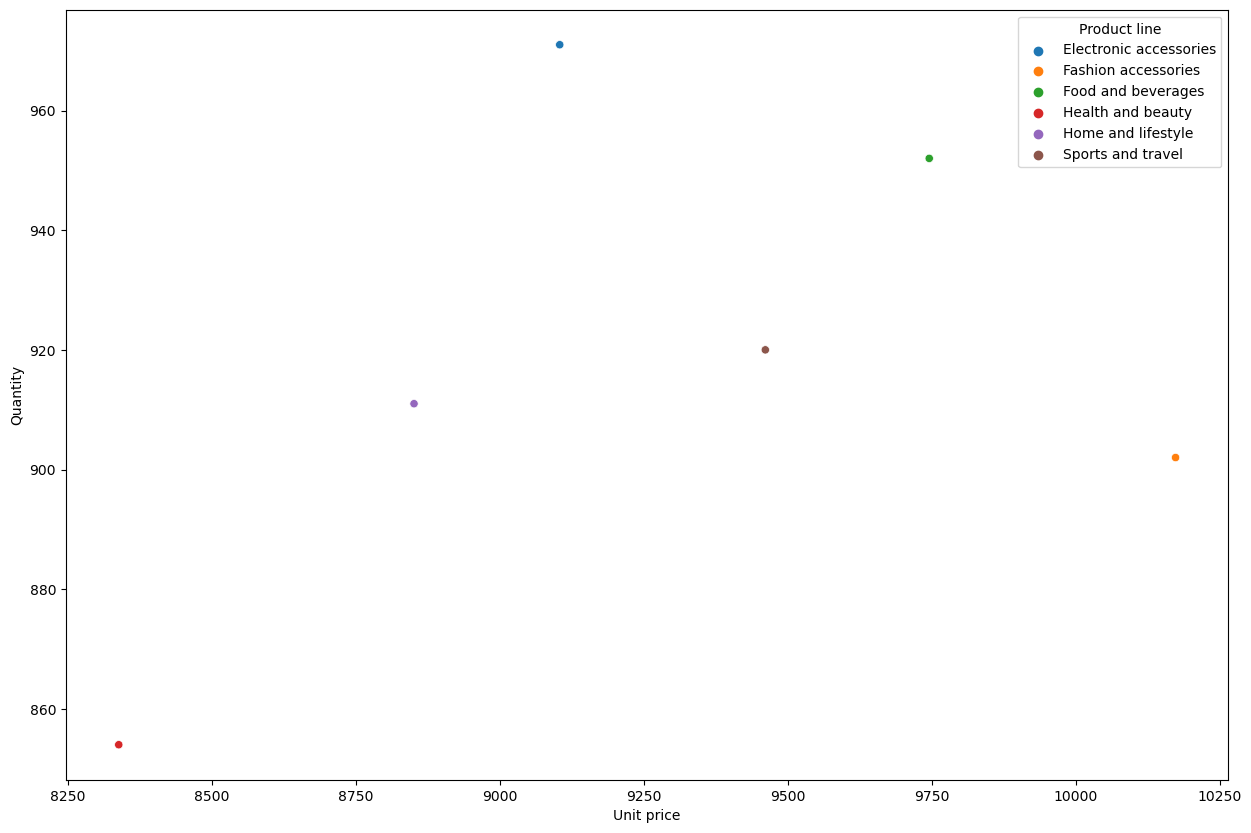

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Quantity_bought,x='Unit price', y="Quantity", hue='Product line');

<Axes: xlabel='Gender', ylabel='gross income'>

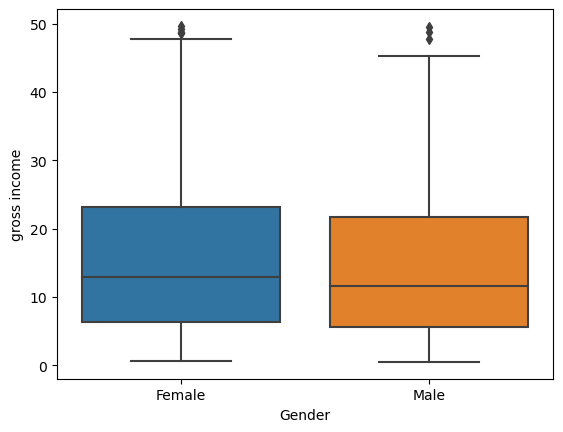

In [32]:
sns.boxplot(x=sales['Gender'], y=sales['gross income'])

<Axes: xlabel='Date', ylabel='gross income'>

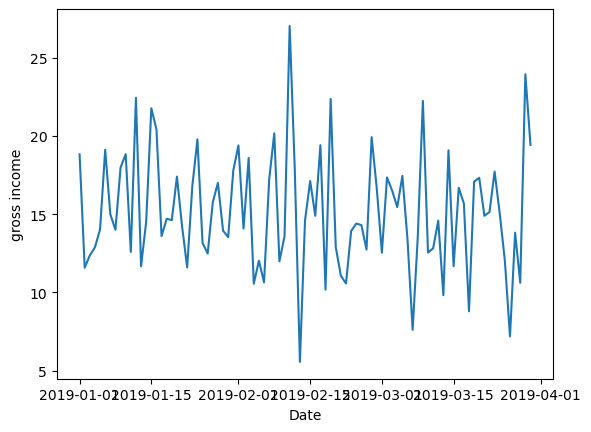

In [33]:
sns.lineplot(x= sales.groupby(sales.index).mean(numeric_only=True).index, 
             y = sales.groupby(sales.index).mean(numeric_only=True)['gross income'])

<Axes: xlabel='Product line', ylabel='gross income'>

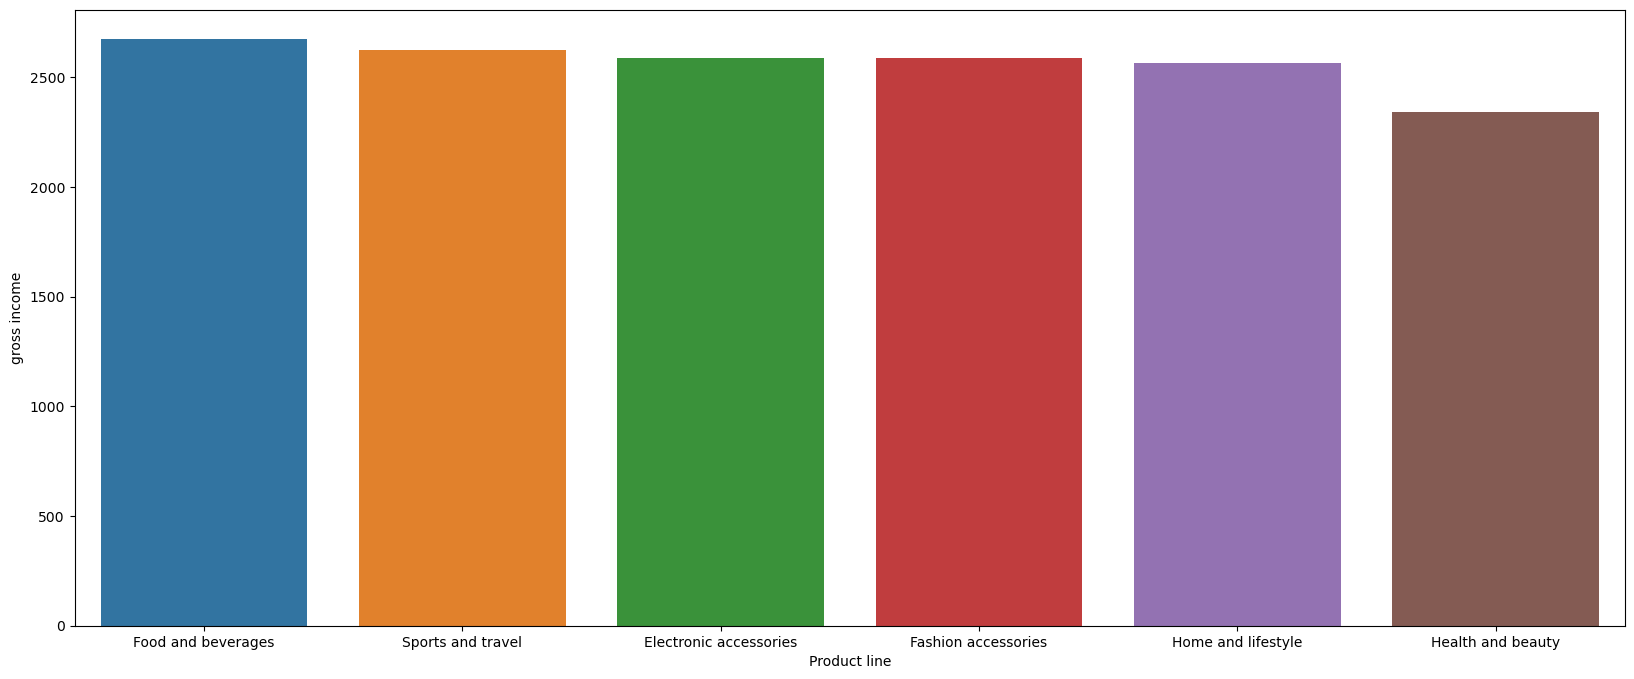

In [34]:
cat=sales[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

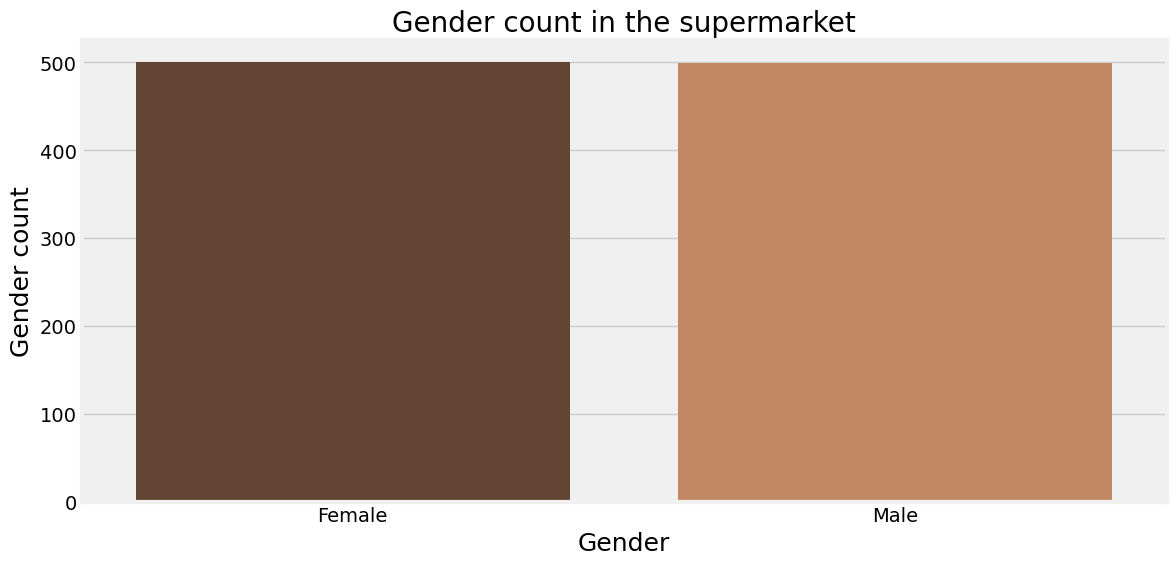

In [35]:

plt.figure(figsize=(14, 6))
plt.style.use('fivethirtyeight')

# Use the x and data parameters explicitly
ax = sns.countplot(x='Gender', data=sales, palette='copper')

ax.set_xlabel(xlabel="Gender", fontsize=18)
ax.set_ylabel(ylabel="Gender count", fontsize=18)
ax.set_title(label="Gender count in the supermarket", fontsize=20)

plt.show()

Text(0, 0.5, 'Peple Count')

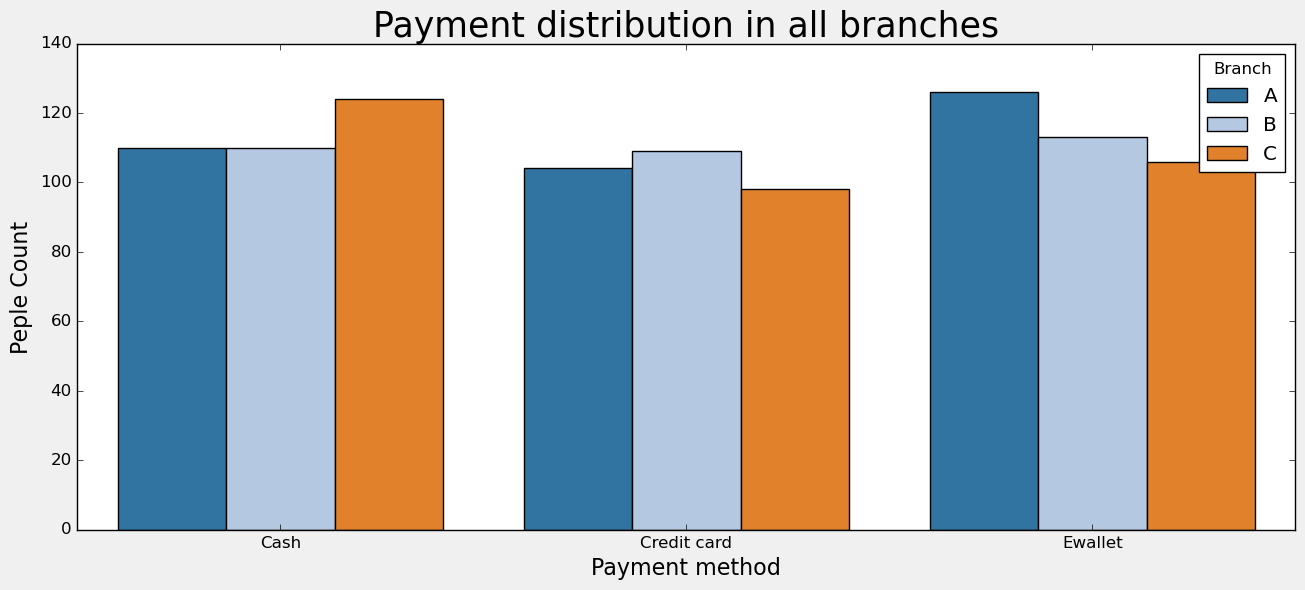

In [36]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = sales, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

Text(0, 0.5, 'Rating distribution')

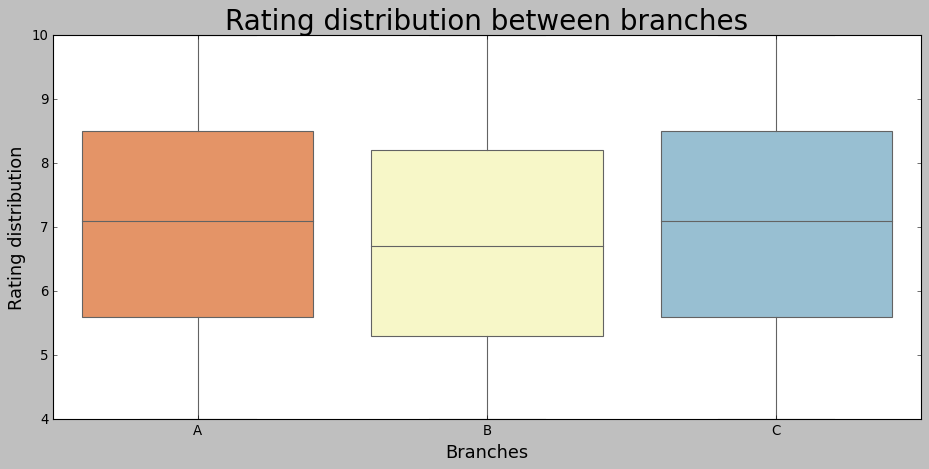

In [37]:
plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =sales, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

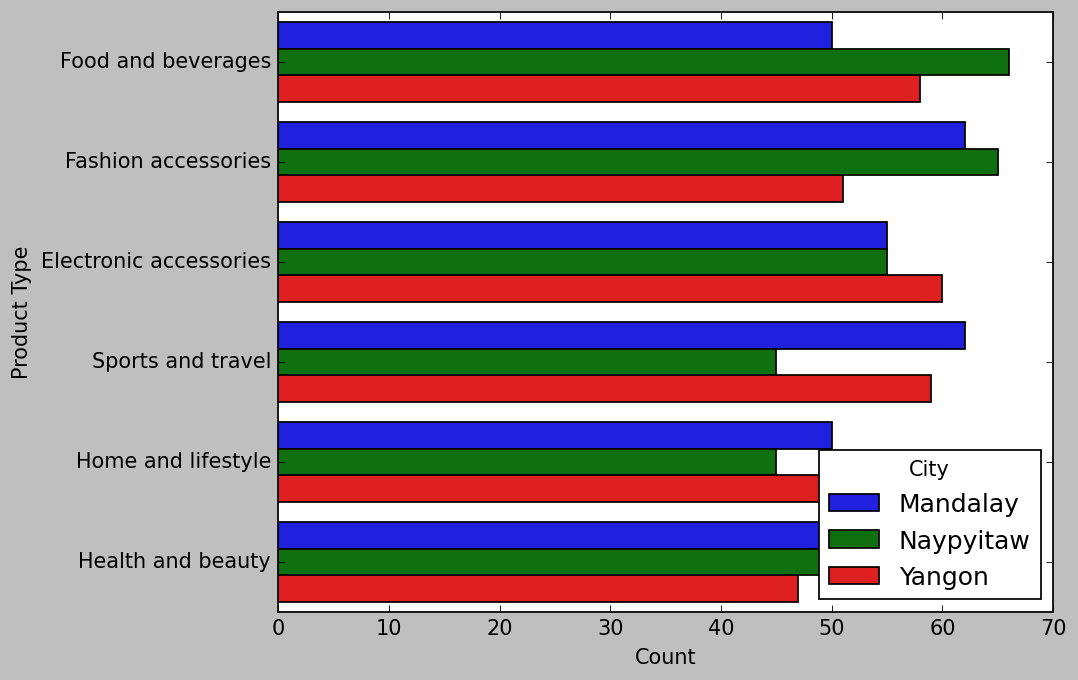

In [38]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

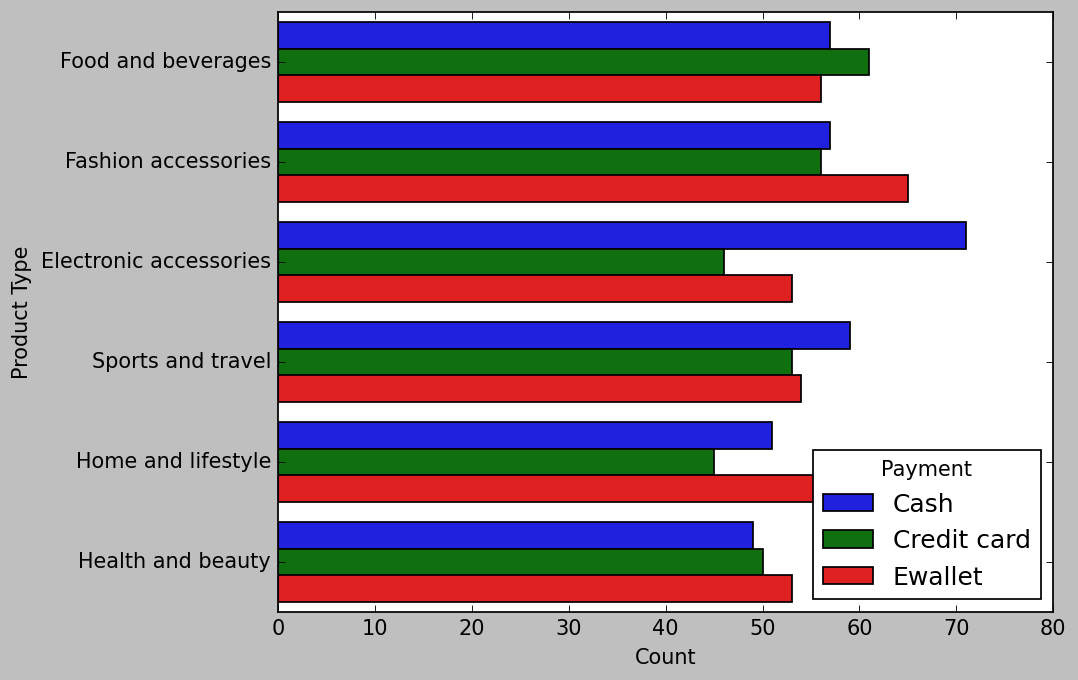

In [39]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Yangon - 340
Naypyitow - 328
Mandalay - 332


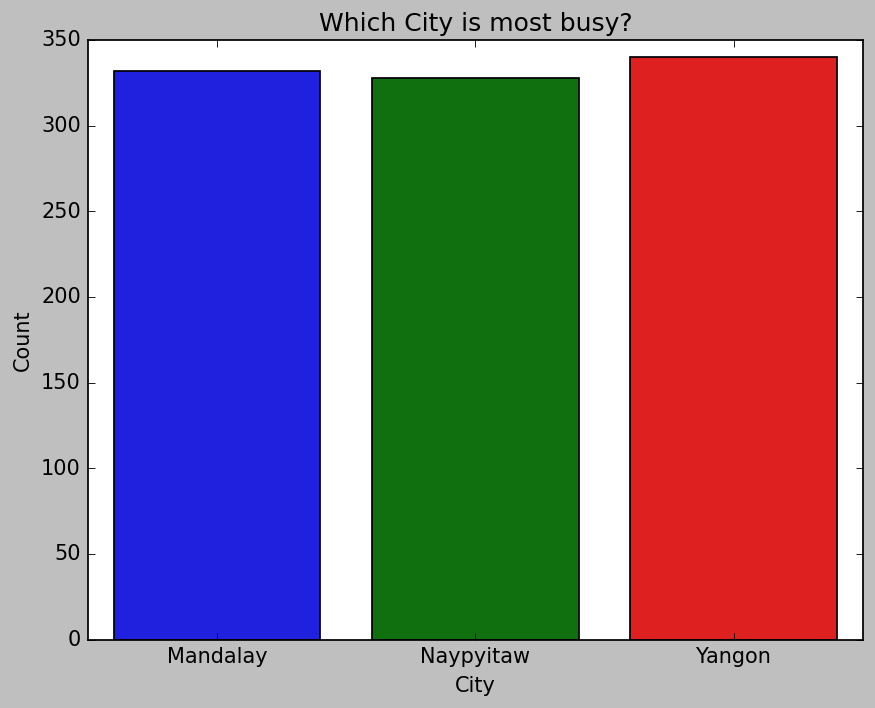

In [40]:

plt.figure(dpi=125)
sns.countplot(x='City', data=sales)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Which City is most busy?')

A, B, C = sales['City'].value_counts()

print('Yangon -', A)
print('Naypyitow -', C)
print('Mandalay -', B)

plt.show()